<a href="https://colab.research.google.com/github/mohanrajmit/DL-Training/blob/master/Animals_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

np.random.seed(35)

In [104]:
!git clone https://github.com/mohanrajmit/Image-Read.git

fatal: destination path 'Image-Read' already exists and is not an empty directory.


In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
from imutils import paths
import cv2

In [107]:
def load(imagePaths):
  # initialize the list of features and labels
  data = []
  labels = []

  # loop over the input images
  for (i, imagePath) in enumerate(imagePaths):
    # load the image and extract the class label assuming
    # that our path has the following format:
    # /path/to/dataset/{class}/{image}.jpg
    image = cv2.imread(imagePath)
    label = imagePath.split("/")[-2]
    labels.append(label)
    #label = imagePath.split(os.path.sep)[-2]
    #/content/Image-Read/animals/dogs/dogs_00044.jpg
    image = cv2.resize(image, (32, 32),interpolation=cv2.INTER_AREA)

    # treat our processed image as a "feature vector"
    # by updating the data list followed by the labels
    data.append(image)
    #labels.append(label)

    # show an update every `verbose` images
    #if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
    #print("[INFO] processed {}/{}".format(i + 1,
    #len(imagePaths)))

    # return a tuple of the data and labels
  return (np.array(data), np.array(labels))

In [108]:
imagePaths = list(paths.list_images("/content/Image-Read/animals"))
print(imagePaths)


['/content/Image-Read/animals/cats/cats_00841.jpg', '/content/Image-Read/animals/cats/cats_00675.jpg', '/content/Image-Read/animals/cats/cats_00726.jpg', '/content/Image-Read/animals/cats/cats_00315.jpg', '/content/Image-Read/animals/cats/cats_00795.jpg', '/content/Image-Read/animals/cats/cats_00130.jpg', '/content/Image-Read/animals/cats/cats_00211.jpg', '/content/Image-Read/animals/cats/cats_00578.jpg', '/content/Image-Read/animals/cats/cats_00029.jpg', '/content/Image-Read/animals/cats/cats_00756.jpg', '/content/Image-Read/animals/cats/cats_00684.jpg', '/content/Image-Read/animals/cats/cats_00574.jpg', '/content/Image-Read/animals/cats/cats_00350.jpg', '/content/Image-Read/animals/cats/cats_00318.jpg', '/content/Image-Read/animals/cats/cats_00943.jpg', '/content/Image-Read/animals/cats/cats_00608.jpg', '/content/Image-Read/animals/cats/cats_00278.jpg', '/content/Image-Read/animals/cats/cats_00171.jpg', '/content/Image-Read/animals/cats/cats_00300.jpg', '/content/Image-Read/animals/c

In [109]:
(data, labels) = load(imagePaths)



In [110]:
data.shape

(3000, 32, 32, 3)

In [111]:
image = data[2000]

array([[[196, 198, 198],
        [197, 199, 199],
        [199, 201, 201],
        ...,
        [169, 178, 178],
        [189, 194, 192],
        [189, 194, 193]],

       [[185, 187, 187],
        [190, 192, 192],
        [191, 195, 195],
        ...,
        [109, 124, 134],
        [168, 178, 179],
        [173, 183, 181]],

       [[144, 151, 151],
        [149, 156, 156],
        [147, 154, 154],
        ...,
        [ 78,  88,  95],
        [109, 121, 121],
        [117, 126, 126]],

       ...,

       [[204, 204, 204],
        [203, 203, 203],
        [196, 196, 196],
        ...,
        [197, 198, 196],
        [186, 187, 185],
        [194, 195, 193]],

       [[204, 204, 203],
        [202, 203, 202],
        [192, 193, 192],
        ...,
        [192, 192, 190],
        [188, 187, 186],
        [192, 192, 190]],

       [[198, 199, 197],
        [198, 199, 197],
        [191, 191, 190],
        ...,
        [195, 193, 192],
        [196, 194, 193],
        [191, 189, 188]]], dtype=uint8)
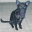

In [112]:
image

In [113]:
image.shape

(32, 32, 3)

In [114]:
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow


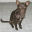

In [115]:
cv2_imshow(image)

In [116]:
print(data.shape)

(3000, 32, 32, 3)


array([[[ 25,  35,  39],
        [ 24,  30,  35],
        [ 29,  32,  37],
        ...,
        [117, 113, 109],
        [132, 124, 116],
        [126, 115, 104]],

       [[ 28,  32,  35],
        [ 29,  35,  39],
        [ 29,  34,  39],
        ...,
        [126, 119, 117],
        [136, 125, 117],
        [131, 119, 107]],

       [[ 31,  44,  49],
        [ 20,  34,  42],
        [ 14,  29,  36],
        ...,
        [140, 127, 123],
        [146, 132, 121],
        [132, 122, 110]],

       ...,

       [[ 28,  38,  44],
        [ 24,  34,  41],
        [ 21,  30,  34],
        ...,
        [ 39,  48,  55],
        [ 34,  43,  47],
        [ 29,  36,  43]],

       [[ 22,  33,  41],
        [ 21,  31,  41],
        [ 24,  34,  41],
        ...,
        [ 38,  48,  55],
        [ 40,  50,  54],
        [ 39,  48,  52]],

       [[ 21,  31,  40],
        [ 21,  31,  39],
        [ 23,  32,  42],
        ...,
        [ 33,  43,  49],
        [ 32,  42,  48],
        [ 33,  42,  47]]], dtype=uint8)
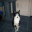

In [117]:
data[0]

In [118]:
data = data.reshape((3000, 3072))

In [119]:
data.shape

(3000, 3072)

In [120]:
print(labels.shape)

(3000,)


In [121]:

data = data.astype('float32')

data/=255

In [122]:
labels[2000]

'dogs'

In [123]:
# prompt: labelencoder for scikit learn libary

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)


In [124]:
le.classes_

array(['cats', 'dogs', 'panda'], dtype='<U5')

In [125]:
labels[0]

0

In [126]:
labels[2000]

1

In [127]:
labels[2500]

1

In [128]:
number_of_classes = 3

Y_train = to_categorical(labels, number_of_classes)



In [129]:
Y_train[1900]

array([0., 0., 1.], dtype=float32)

In [130]:
labels[1900]

2

In [131]:
# prompt: traintest split with scikitlearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, Y_train, test_size=0.2, random_state=35)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(2400, 3072)
(2400, 3)
(600, 3072)
(600, 3)


In [146]:
from tensorflow.keras.layers import BatchNormalization

In [147]:
model = Sequential()

model.add(Dense(2000, input_dim=3072,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1000,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3,activation='softmax'))


In [148]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [149]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2000)              6146000   
                                                                 
 batch_normalization (Batch  (None, 2000)              8000      
 Normalization)                                                  
                                                                 
 dropout_7 (Dropout)         (None, 2000)              0         
                                                                 
 dense_21 (Dense)            (None, 1000)              2001000   
                                                                 
 batch_normalization_1 (Bat  (None, 1000)              4000      
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 1000)             

In [150]:
# prompt: model checkpoint and earlys topping with val accuracy

from keras.callbacks import ModelCheckpoint, EarlyStopping

# define the model checkpoint path
model_checkpoint_path = "/content/drive/My Drive/checkpoints/weights.{epoch:02d}-{val_accuracy:.2f}.hdf5"

# define the model checkpoint callback
model_checkpoint = ModelCheckpoint(
    filepath=model_checkpoint_path,
    monitor="val_accuracy",

    save_best_only=True,
)

# define the early stopping callback
early_stopping = EarlyStopping(
    monitor="val_accuracy", patience=10, verbose=1
)

# train the model with the callbacks
history = model.fit(
    X_train,
    y_train,
    batch_size=256,
    epochs=100,
    validation_split=0.2,
    callbacks=[model_checkpoint, early_stopping],
)


Epoch 1/100
5/8 [=================>............] - ETA: 0s - loss: 1.7453 - accuracy: 0.4875 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 4s 116ms/step - loss: 1.6396 - accuracy: 0.4990 - val_loss: 4.2939 - val_accuracy: 0.3083
Epoch 2/100
8/8 [==============================] - 1s 82ms/step - loss: 1.0365 - accuracy: 0.6026 - val_loss: 5.0739 - val_accuracy: 0.3438
Epoch 3/100
8/8 [==============================] - 0s 16ms/step - loss: 0.8984 - accuracy: 0.6276 - val_loss: 5.1505 - val_accuracy: 0.3104
Epoch 4/100
8/8 [==============================] - 0s 16ms/step - loss: 0.7851 - accuracy: 0.6646 - val_loss: 5.5447 - val_accuracy: 0.3146
Epoch 5/100
8/8 [==============================] - 0s 17ms/step - loss: 0.7564 - accuracy: 0.6589 - val_loss: 4.9005 - val_accuracy: 0.3417
Epoch 6/100
8/8 [==============================] - 0s 19ms/step - loss: 0.7477 - accuracy: 0.6776 - val_loss: 3.2829 - val_accuracy: 0.3104
Epoch 7/100
8/8 [==============================] - 0s 65ms/step - loss: 0.6880 - accuracy: 0.6896 - val_loss: 2.5814 - val_accuracy: 0.3771
Epoch 8/100
8/8 [==============

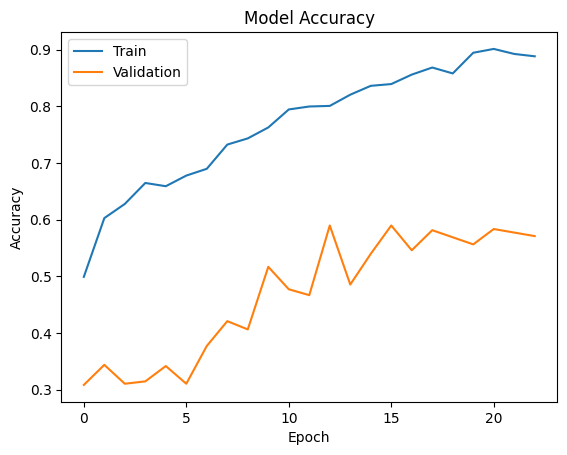

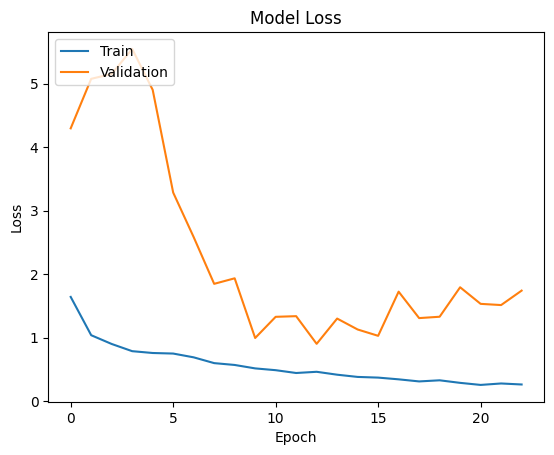

In [151]:
# prompt: matplot training loss accuracy and valdiation loss and accuracy

import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [152]:
# prompt: model prediciton for test data and confusion matrix

import numpy as np
y_pred = model.predict(X_test)



19/19 [==============================] - 0s 2ms/step


In [153]:
y_pred[0]

array([3.6924241e-09, 3.1971664e-13, 1.0000000e+00], dtype=float32)

In [ ]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)

[[ 84  84  25]
 [ 61 137  21]
 [ 13  26 149]]


In [ ]:
label_name=["cats","dogs","panda"]

In [ ]:
img=cv2.imread("/content/pandas.jpg")
img2=cv2.resize(img, (32, 32),interpolation=cv2.INTER_AREA)
img1=img2.flatten()


In [ ]:
img1.shape

(3072,)

In [ ]:

# insert a new axis along the row
b = np.expand_dims(img1, axis=0)


In [ ]:
b.shape

(1, 3072)

In [ ]:
res=model.predict(b)
print(res)
#print(label_name[int(res)])



1/1 [==============================] - 0s 30ms/step
[[0. 0. 1.]]


In [ ]:
res = np.argmax(res,axis=1)

In [ ]:
res

array([2])

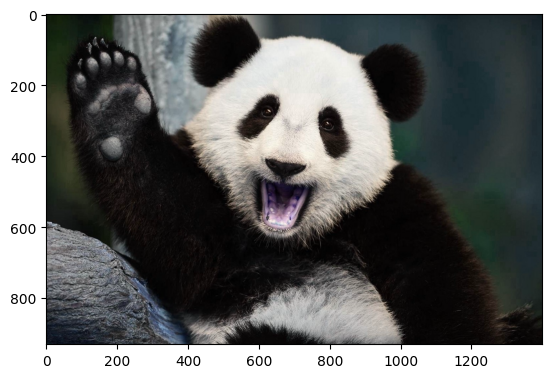

In [ ]:
plt.imshow(img)